In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'
%matplotlib inline

Initialization done, Notebook was last run on: 07/05/2019


In [21]:
import lax 
from lax.lichens import sciencerun1
from lax.lichens import sciencerun0

from pax import units, configuration
pax_config = configuration.load_configuration('XENON1T')['DEFAULT']
tpc_height = pax_config['tpc_length']
tpc_radius = pax_config['tpc_radius']

import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1'], 
         minitree_paths = ['/dali/lgrandi/giovo/minitrees/pax_v6.10.1',
                           '/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1'],
         make_minitrees = False)
hax.config['corrections_definitions']['s2_xy_map'].append({'correction': '/project2/lgrandi/zhut/LCE_JSONs/XENON1T_s2_xy_ly_SR2_v1.2_pre_18836.json', 
                                                           'run_min': 16640,
                                                           'run_max': 18835})
hax.config['corrections_definitions']['s2_xy_map'][1]['run_max'] = 16639
hax.config['corrections_definitions']['s2_xy_map'][2]['run_min'] = 18836

for entry in hax.config['corrections_definitions']['s2_xy_map']:
    print(entry)


{'run_max': 6385, 'correction': 'XENON1T_s2_xy_ly_SR0_24Feb2017.json', 'run_min': 0}
{'run_max': 16639, 'correction': 'XENON1T_s2_xy_ly_SR1_v2.2.json', 'run_min': 6386}
{'correction': 'XENON1T_s2_xy_ly_SR2_v1.2.json', 'run_min': 18836}
{'run_max': 18835, 'correction': '/project2/lgrandi/zhut/LCE_JSONs/XENON1T_s2_xy_ly_SR2_v1.2_pre_18836.json', 'run_min': 16640}


# Reading of data

In [4]:
DataNG1 = pd.read_pickle('/dali/lgrandi/giovo/minitrees/pax_v6.10.1/SR2_NG1_DAQandFlash_z10_pax6.10.1.pkl')
DataNG2 = pd.read_pickle('/dali/lgrandi/giovo/minitrees/pax_v6.10.1/SR2_NG2_DAQandFlash_z10_pax6.10.1.pkl')
DataNG3 = pd.read_pickle('/dali/lgrandi/giovo/minitrees/pax_v6.10.1/SR2_NG3_DAQandFlash_z10_pax6.10.1.pkl')
DataNG4 = pd.read_pickle('/dali/lgrandi/giovo/minitrees/pax_v6.10.1/SR2_NG4_DAQandFlash_z10_pax6.10.1.pkl')

## DAQVeto, Flash, Radius and Height¶

In [5]:
#DataNG1 = hax.cuts.selection(DataNG1, DataNG1['CutDAQVeto'] == True)
#DataNG1 = hax.cuts.selection(DataNG1, DataNG1['CutFlash'] == True)
DataNG1 = hax.cuts.selection(DataNG1, DataNG1['Cut_r_3d_nn_tf'] == True)
DataNG1 = hax.cuts.selection(DataNG1, DataNG1['Cut_z_3d_nn_tf'] == True)

Unnamed selection: 2660467 rows removed (54.52% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 1195591 rows removed (62.51% passed)


In [6]:
#DataNG2 = hax.cuts.selection(DataNG2, DataNG2['CutDAQVeto'] == True)
#DataNG2 = hax.cuts.selection(DataNG2, DataNG2['CutFlash'] == True)
DataNG2 = hax.cuts.selection(DataNG2, DataNG2['Cut_r_3d_nn_tf'] == True)
DataNG2 = hax.cuts.selection(DataNG2, DataNG2['Cut_z_3d_nn_tf'] == True)

Unnamed selection: 1749597 rows removed (55.24% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 808469 rows removed (62.55% passed)


In [7]:
#DataNG3 = hax.cuts.selection(DataNG3, DataNG3['CutDAQVeto'] == True)
#DataNG3 = hax.cuts.selection(DataNG3, DataNG3['CutFlash'] == True)
DataNG3 = hax.cuts.selection(DataNG3, DataNG3['Cut_r_3d_nn_tf'] == True)
DataNG3 = hax.cuts.selection(DataNG3, DataNG3['Cut_z_3d_nn_tf'] == True)

Unnamed selection: 1483984 rows removed (52.82% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 555013 rows removed (66.60% passed)


In [8]:
#DataNG4 = hax.cuts.selection(DataNG4, DataNG4['CutDAQVeto'] == True)
#DataNG4 = hax.cuts.selection(DataNG4, DataNG4['CutFlash'] == True)
DataNG4 = hax.cuts.selection(DataNG4, DataNG4['Cut_r_3d_nn_tf'] == True)
DataNG4 = hax.cuts.selection(DataNG4, DataNG4['Cut_z_3d_nn_tf'] == True)

Unnamed selection: 1613833 rows removed (54.89% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


Unnamed selection: 650927 rows removed (66.85% passed)


In [9]:
print(len(DataNG1), len(DataNG2), len(DataNG3), len(DataNG4))

1993854 1350575 1106673 1312794


# 50 < s2_range_50p_area < 15e3

In [10]:
DataNG1['Cut_s2_range_50p_area'] = (DataNG1['s2_range_50p_area'] < 15e3) & (DataNG1['s2_range_50p_area'] > 500)
DataNG2['Cut_s2_range_50p_area'] = (DataNG2['s2_range_50p_area'] < 15e3) & (DataNG2['s2_range_50p_area'] > 500)
DataNG3['Cut_s2_range_50p_area'] = (DataNG3['s2_range_50p_area'] < 15e3) & (DataNG3['s2_range_50p_area'] > 500)
DataNG4['Cut_s2_range_50p_area'] = (DataNG4['s2_range_50p_area'] < 15e3) & (DataNG4['s2_range_50p_area'] > 500)

In [11]:
DataNG1 = hax.cuts.selection(DataNG1, DataNG1['Cut_s2_range_50p_area'] == True)

Unnamed selection: 40498 rows removed (97.97% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [12]:
DataNG2 = hax.cuts.selection(DataNG2, DataNG2['Cut_s2_range_50p_area'] == True)

Unnamed selection: 22496 rows removed (98.33% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [13]:
DataNG3 = hax.cuts.selection(DataNG3, DataNG3['Cut_s2_range_50p_area'] == True)

Unnamed selection: 21048 rows removed (98.10% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [14]:
DataNG4 = hax.cuts.selection(DataNG4, DataNG4['Cut_s2_range_50p_area'] == True)

Unnamed selection: 17756 rows removed (98.65% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


# S2 AFT

In [15]:
DataNG1['s2XYcorrection'] = DataNG1['s2']*DataNG1['s2_xy_correction_tot_nn_tf']
DataNG2['s2XYcorrection'] = DataNG2['s2']*DataNG2['s2_xy_correction_tot_nn_tf']
DataNG3['s2XYcorrection'] = DataNG3['s2']*DataNG3['s2_xy_correction_tot_nn_tf']
DataNG4['s2XYcorrection'] = DataNG4['s2']*DataNG4['s2_xy_correction_tot_nn_tf']

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


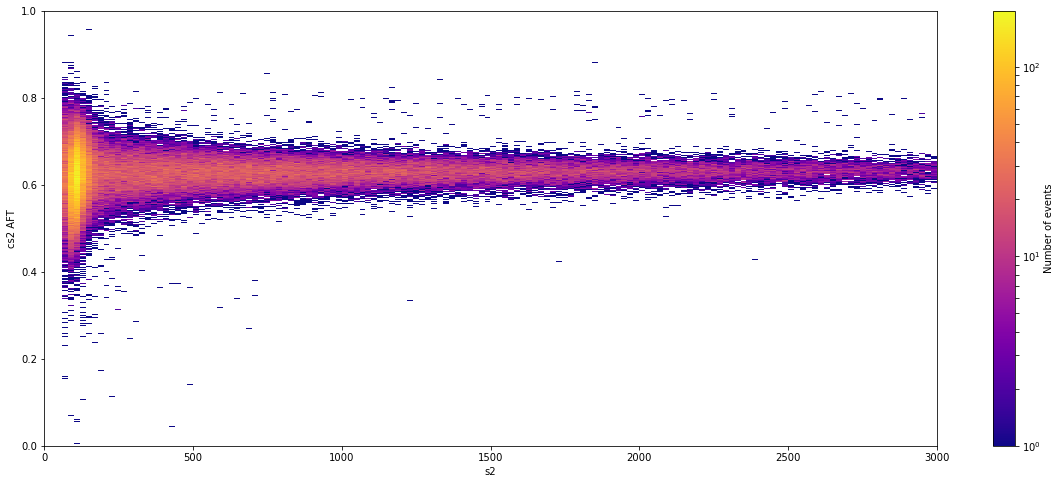

In [19]:
fig = plt.figure(1, figsize=(20,8))
hist, xbins, ybins, _ = plt.hist2d(DataNG1['s2'], 
                                   DataNG1['cs2_top_nn_tf']/DataNG1['cs2_nn_tf'],
                                   bins=(150,1000), 
                                   range=((0,3e3), (0.0,1.0)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(),
                                   cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2')
plt.ylabel('cs2 AFT')

### That fucking map

In [31]:
from hax.corrections_handler import CorrectionsHandler

# correct S2 using preliminary S2 correction map
s2_xy_correction_top_sr2 = []
s2_xy_correction_bottom_sr2 = []

corr_handler = CorrectionsHandler()

for row in DataNG4.itertuples():
    pos_obs = [row.x_observed_nn_tf, row.y_observed_nn_tf]
    s2_xy_correction_top_sr2.append(1.0 / corr_handler.get_correction_from_map('s2_xy_map', row.run_number, pos_obs,
                                                                               map_name='map_top'))
    s2_xy_correction_bottom_sr2.append(1.0 / corr_handler.get_correction_from_map('s2_xy_map', row.run_number, pos_obs,
                                                                                  map_name='map_bottom'))

In [32]:
DataNG4 = DataNG4.assign(s2_xy_correction_top_sr2=s2_xy_correction_top_sr2)
DataNG4 = DataNG4.assign(s2_xy_correction_bottom_sr2=s2_xy_correction_bottom_sr2)

DataNG4 = DataNG4.assign(cs2_top_sr2=DataNG4.cs2_top / DataNG4.s2_xy_correction_top_nn_tf * DataNG4.s2_xy_correction_top_sr2)
DataNG4 = DataNG4.assign(cs2_bottom_sr2=DataNG4.cs2_bottom / DataNG4.s2_xy_correction_bottom_nn_tf *
                       DataNG4.s2_xy_correction_bottom_sr2)
DataNG4 = DataNG4.assign(cxys2_sr2=(DataNG4.cs2_top_sr2 + DataNG4.cs2_bottom_sr2) / DataNG4.s2_lifetime_correction)
DataNG4 = DataNG4.assign(cs2_aft_sr2=DataNG4.cs2_top_sr2 / (DataNG4.cs2_top_sr2 + DataNG4.cs2_bottom_sr2))

print('###############\n\nNeutron Generator data\n\n###############')
data_distribution(df = DataNG1, x = 'x_3d_nn_tf', y = 'y_3d_nn_tf',  z = 'z_3d_nn_tf', 
                  r = 'r_3d_nn_tf', bins = ([100,100]))

DataNG1['s2XYcorrection'] = DataNG1['s2']*DataNG1['s2_xy_correction_tot_nn_tf']
Hist_s1_s2(df = DataNG1, x = 's1', y = 's2XYcorrection', bins_x = 1000, bins_y = 1000, 
           range_x = [0,1e5], range_y = [0,1e6], x_s = 0, x_e = 1e5, y_s = 0, y_e = 1e6)

fig = plt.figure(1, figsize=(20,8))
plt.hist2d(DataNG1['s1'], DataNG1['s2']/100, 
           bins=(500,500), 
           range=((0,4e3), (0,2e3)), 
           cmap=plt.cm.jet, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1')
plt.ylabel('s2/100')

fig = plt.figure(1, figsize=(20,8))
plt.hist2d(DataNG1['drift_time']/1e3, DataNG1['s2_range_50p_area']/1e3, 
           bins=(100,100), 
           range=((0,800), (0,30)), 
           cmap=plt.cm.jet, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('drift_time [us]')
plt.ylabel('s2_range_50p_area [us]')

plt.hist2d(DataNG1['s2XYcorrection'], DataNG1['s1'], 
           bins=(200,200), 
           range=((0,1000), (0,80000)), 
           cmap=plt.cm.jet, norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s2XYcorrection')
plt.ylabel('s1')